In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/dataset/HandGestureData.zip

Streaming output truncated to the last 5000 lines.
  inflating: Rock-Paper-Scissors/train/paper/paper04-118.png  
  inflating: Rock-Paper-Scissors/train/paper/paper04-119.png  
  inflating: Rock-Paper-Scissors/train/paper/paper05-000.png  
  inflating: Rock-Paper-Scissors/train/paper/paper05-001.png  
  inflating: Rock-Paper-Scissors/train/paper/paper05-002.png  
  inflating: Rock-Paper-Scissors/train/paper/paper05-003.png  
  inflating: Rock-Paper-Scissors/train/paper/paper05-004.png  
  inflating: Rock-Paper-Scissors/train/paper/paper05-005.png  
  inflating: Rock-Paper-Scissors/train/paper/paper05-006.png  
  inflating: Rock-Paper-Scissors/train/paper/paper05-007.png  
  inflating: Rock-Paper-Scissors/train/paper/paper05-008.png  
  inflating: Rock-Paper-Scissors/train/paper/paper05-009.png  
  inflating: Rock-Paper-Scissors/train/paper/paper05-010.png  
  inflating: Rock-Paper-Scissors/train/paper/paper05-011.png  
  inflating: Rock-Paper-Scissors/train/paper/paper05-012.png  
  in

In [3]:
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import matplotlib
matplotlib.style.use('ggplot')

In [4]:
IMAGE_SHAPE = (300, 300)
TRAINING_DATA_DIR = '/content/dataset/train'
VALID_DATA_DIR = '/content/dataset/validation'

In [6]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)
train_generator = datagen.flow_from_directory(
    TRAINING_DATA_DIR,
    shuffle=True,
    target_size=IMAGE_SHAPE,
)
valid_generator = datagen.flow_from_directory(
    VALID_DATA_DIR,
    shuffle=False,
    target_size=IMAGE_SHAPE,
)

Found 2520 images belonging to 3 classes.
Found 0 images belonging to 0 classes.


In [7]:
def build_model(num_classes):
    model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=8, kernel_size=(3, 3), activation='relu',
                           input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    return model
model = build_model(num_classes=3)

In [8]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(lr=0.0001),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 8)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 16)      1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 32)       0

In [9]:
EPOCHS = 5
BATCH_SIZE = 32
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=valid_generator,
                    validation_steps= valid_generator.samples // BATCH_SIZE,
                    verbose=1
                    )

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5561: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


78/78 [==============================] - 27s 188ms/step - loss: 0.5753 - accuracy: 0.8083
Epoch 2/5
78/78 [==============================] - 14s 183ms/step - loss: 0.0169 - accuracy: 0.9956
Epoch 3/5
78/78 [==============================] - 14s 180ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 4/5
78/78 [==============================] - 14s 180ms/step - loss: 4.0287e-04 - accuracy: 1.0000
Epoch 5/5
78/78 [==============================] - 14s 179ms/step - loss: 1.9335e-04 - accuracy: 1.0000


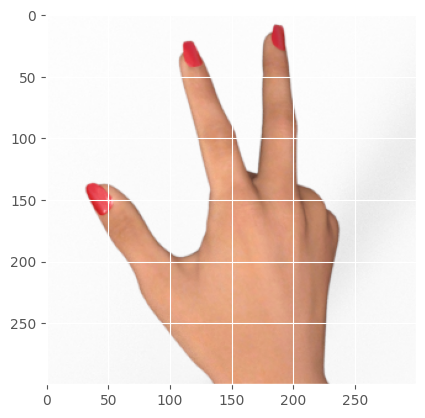

In [10]:
from keras.preprocessing import image
import numpy as np
import keras.utils as image

#Input image
test_image = image.load_img('/content/dataset/test/scissors/testscissors01-00.png',target_size=(300,300))

#For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

In [11]:
res = model.predict(test_image)

1/1 [==============================] - 0s 203ms/step


In [12]:
res = res.tolist()

In [13]:
rlocation = res[0].index(1.0)

In [14]:
rlocation
if rlocation == 0:
  print("paper")
elif rlocation == 1:
  print("rock")
else:
  print("scissors")

scissors
